<a href="https://colab.research.google.com/github/calvinadoho/Projet-ML-TNT/blob/main/Machine_Learning_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from google.colab import drive

In [4]:
drive.mount('/gdrive')
os.listdir("/gdrive/MyDrive/Résultats TNT")

Mounted at /gdrive


['Base_Complete_avec_RxPower_dBm_New.xlsx',
 'Base_finale_CTGAN_10000.csv',
 'lr_test_scores.png',
 'lr_train_scores.png',
 'comparaison_meilleurs_modeles.csv',
 'Data_remplies.csv',
 'data_encoded.csv',
 'base_équilibrée.csv',
 'Base_finale_CTGAN_13000.csv',
 'Base_de_données_outliers.csv',
 'Data_standardisé.csv',
 'Base_filtrée_univariée.csv',
 'donnees_test.csv',
 'Data_variables_selectionnees.csv',
 'Data_PCA.csv',
 'donnees_train.csv']

In [5]:
Data=pd.read_csv("/gdrive/MyDrive/Résultats TNT/donnees_train.csv")
Data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,E_field
0,-3.582160,0.588988,-0.429459,-0.516822,-0.759804,-1.656105,1.266508,-0.531357,0.156606,-1.085495
1,-4.235498,1.104543,1.204853,0.908867,0.722104,-0.332313,-0.527619,-0.024226,0.327168,-0.533497
2,-2.482544,-0.813770,-1.031440,2.159790,-0.650631,-1.191046,0.781815,-1.137496,0.483518,0.643004
3,3.769746,-1.226192,1.345842,-0.646406,-0.249110,-0.238059,0.352217,-0.052981,0.011017,0.628368
4,-3.231744,-0.017891,-0.010763,-2.240379,0.599253,-1.053047,-0.180551,-1.271183,0.055261,-1.046804
...,...,...,...,...,...,...,...,...,...,...
10769,3.922067,-1.294008,1.651560,-0.129765,0.470233,-0.019111,0.248080,0.213496,-0.123826,0.598018
10770,-4.872955,1.688298,1.516587,-0.238162,-0.114956,0.107848,-0.165691,0.430644,0.099393,-1.791598
10771,2.483904,1.226895,0.200222,0.700404,-0.779340,0.022278,-0.284449,-0.592005,0.202523,0.201934
10772,3.571248,-1.206643,0.796775,-0.114699,-0.244109,0.232418,0.029928,-0.746312,0.755393,0.922001


**REGRESSION LINEAIRE**

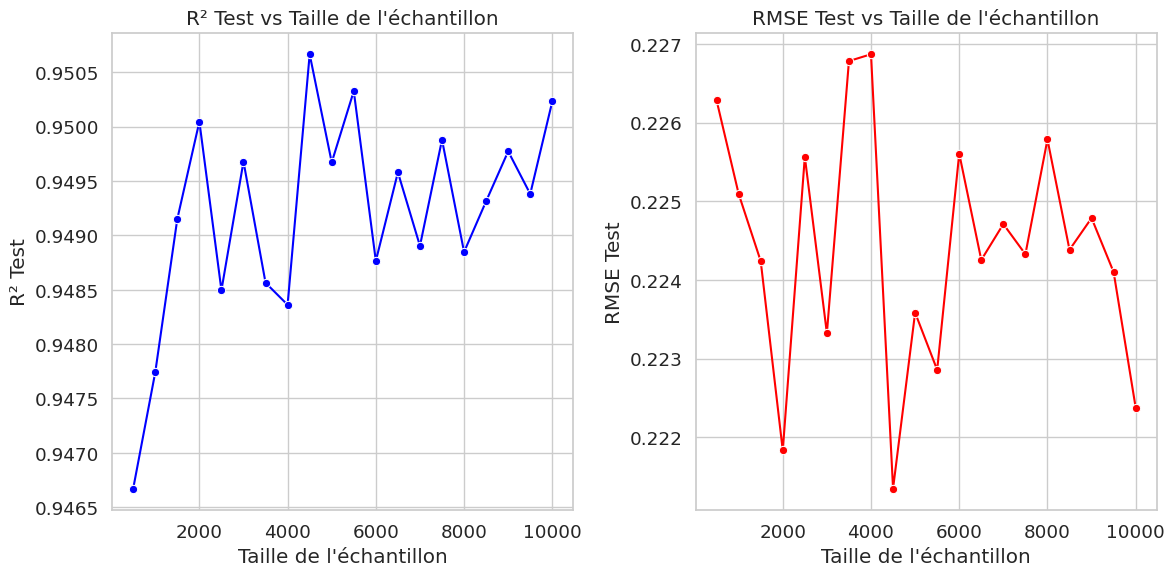

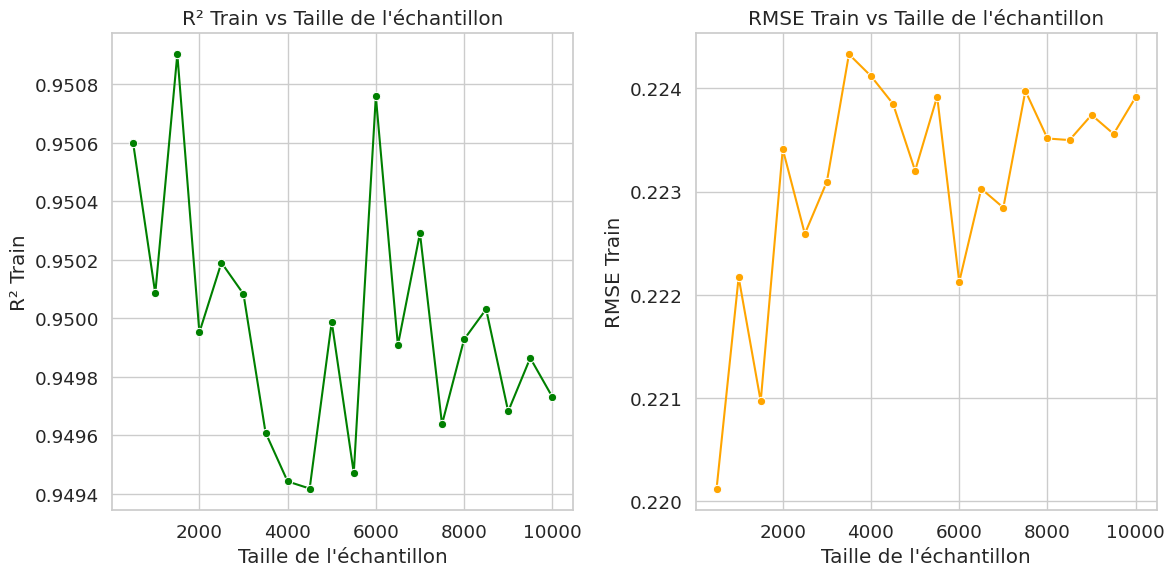

In [6]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire pour enregistrer les résultats
results_lr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle sur les tailles d’échantillons
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        sample_indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)

        modelRL = LinearRegression()
        modelRL.fit(X_train, y_train)

        y_pred_test = modelRL.predict(X_test)
        y_pred_train = modelRL.predict(X_train)

        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    results_lr['sample_size'].append(size)
    results_lr['R2_test'].append(np.mean(r2_test_scores))
    results_lr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_lr['R2_train'].append(np.mean(r2_train_scores))
    results_lr['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame des résultats
df_results_lr = pd.DataFrame(results_lr)

# Visualisation - Image 1 : R2_test et RMSE_test
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/lr_test_scores.png", dpi=300)
plt.show()
plt.close()

# Visualisation - Image 2 : R2_train et RMSE_train
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_lr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_lr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/lr_train_scores.png", dpi=300)
plt.show()
plt.close()


**XGBOOST**

Résultats moyens XGBoost Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.888809   0.325234  0.999999    0.001008
1          1000  0.917332   0.285965  0.999967    0.005684
2          1500  0.917442   0.285376  0.999808    0.013684
3          2000  0.927140   0.267576  0.999481    0.022635
4          2500  0.934638   0.253628  0.999075    0.030187
5          3000  0.937956   0.248742  0.998540    0.038015
6          3500  0.939951   0.244397  0.997958    0.045038
7          4000  0.939782   0.243662  0.997535    0.049453
8          4500  0.941124   0.240809  0.996844    0.056001
9          5000  0.943092   0.236075  0.996209    0.061465
10         5500  0.945370   0.232851  0.995637    0.065903
11         6000  0.946591   0.230378  0.995112    0.069914
12         6500  0.947288   0.228232  0.994600    0.073332
13         7000  0.947726   0.228033  0.994023    0.077134
14         7500  0.948798   0.225499  0.993657    0.079404
15         8000  0.

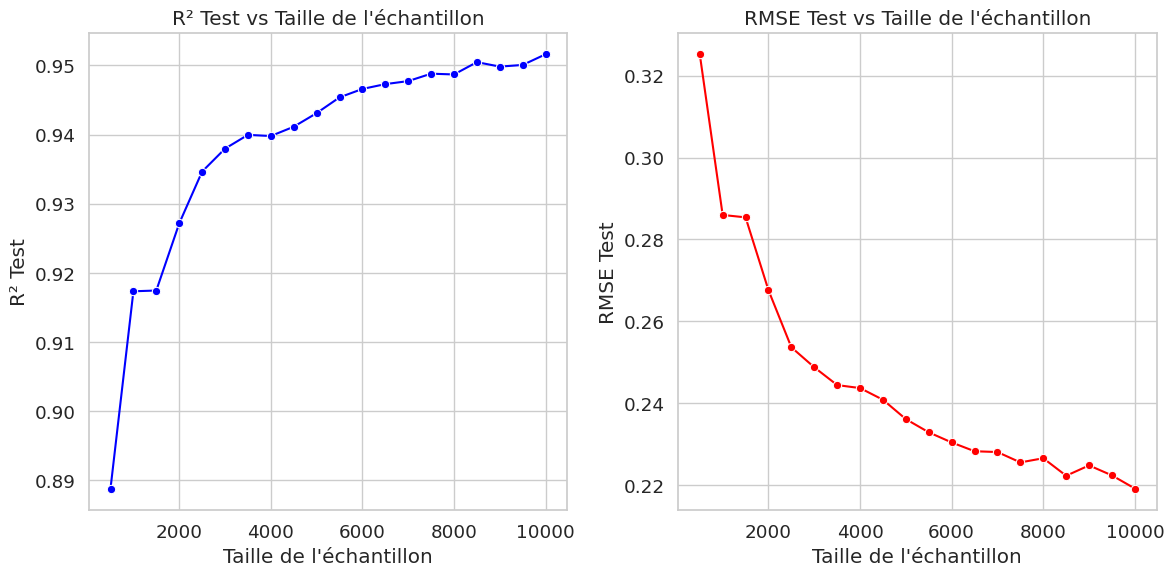

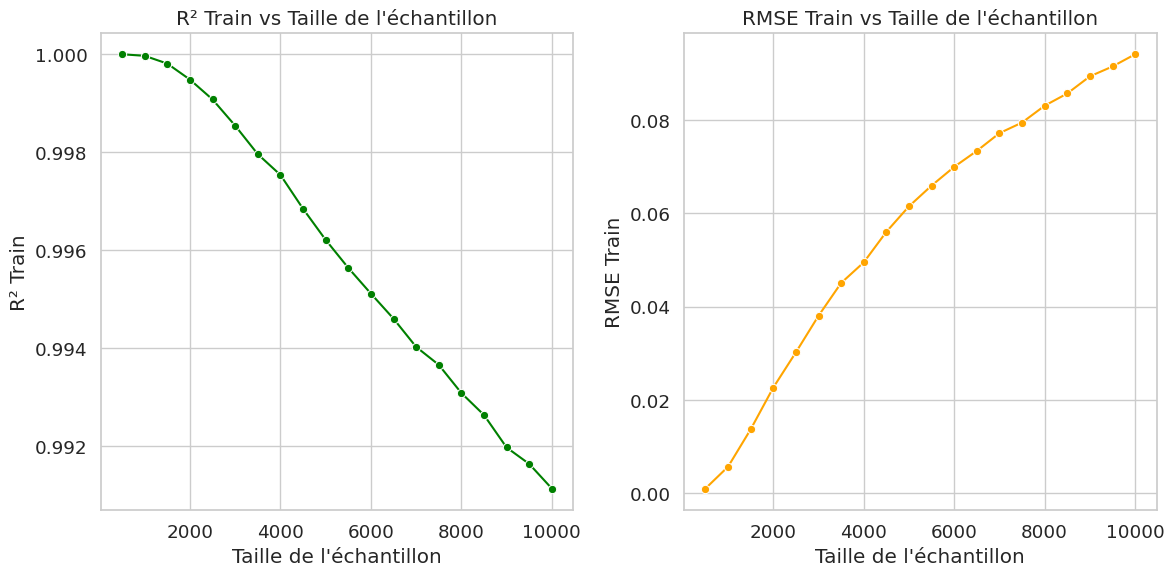

In [7]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire des résultats
results_xgb = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle d'entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None)

        modelXGB = XGBRegressor(objective='reg:squarederror', random_state=42)
        modelXGB.fit(X_train, y_train)

        y_pred_test = modelXGB.predict(X_test)
        y_pred_train = modelXGB.predict(X_train)

        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    results_xgb['sample_size'].append(size)
    results_xgb['R2_test'].append(np.mean(r2_test_scores))
    results_xgb['RMSE_test'].append(np.mean(rmse_test_scores))
    results_xgb['R2_train'].append(np.mean(r2_train_scores))
    results_xgb['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_xgb = pd.DataFrame(results_xgb)
print("Résultats moyens XGBoost Regressor :")
print(df_results_xgb)

# === Image 1 : R2_test + RMSE_test ===
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/xgb_test_scores.png", dpi=300)
plt.show()
plt.close()

# === Image 2 : R2_train + RMSE_train ===
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_xgb, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_xgb, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/xgb_train_scores.png", dpi=300)
plt.show()
plt.close()


**RANDOM FOREST**

Résultats moyens Random Forest Regressor :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.879213   0.346730  0.983655    0.127783
1          1000  0.910690   0.299569  0.986857    0.114315
2          1500  0.917386   0.285507  0.988051    0.108402
3          2000  0.920607   0.278554  0.989037    0.104505
4          2500  0.929335   0.264406  0.989943    0.100309
5          3000  0.929464   0.263701  0.990181    0.099033
6          3500  0.931477   0.258459  0.990648    0.096699
7          4000  0.934504   0.255165  0.990730    0.096118
8          4500  0.936335   0.251529  0.991191    0.093997
9          5000  0.939516   0.245402  0.991348    0.092894
10         5500  0.941807   0.240325  0.991498    0.092141
11         6000  0.940518   0.242839  0.991641    0.091452
12         6500  0.940807   0.242345  0.991846    0.090139
13         7000  0.943598   0.235707  0.992004    0.089354
14         7500  0.943542   0.237388  0.992149    0.088414
15         80

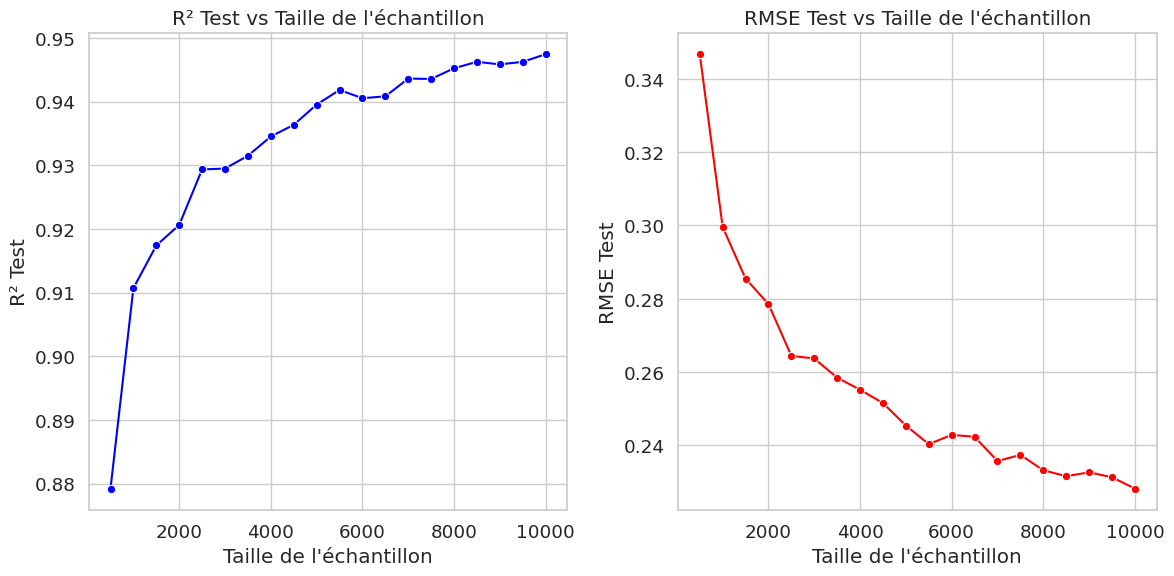

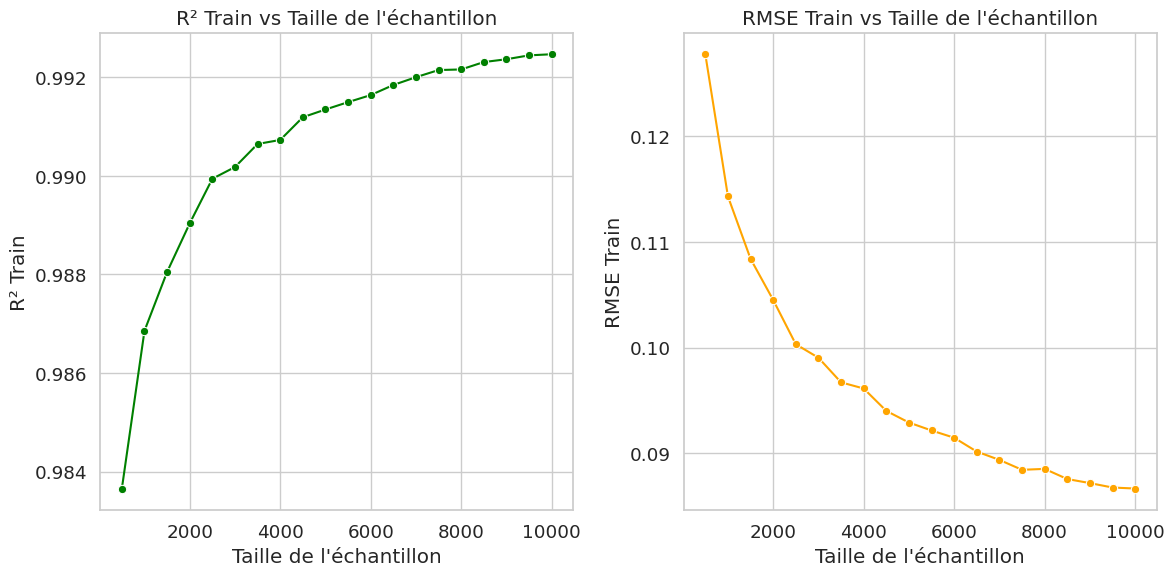

In [8]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Dictionnaire des résultats
results_rf = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle d’entraînement
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle
        modelRF = RandomForestRegressor(random_state=42)
        modelRF.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelRF.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelRF.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyenne des résultats
    results_rf['sample_size'].append(size)
    results_rf['R2_test'].append(np.mean(r2_test_scores))
    results_rf['RMSE_test'].append(np.mean(rmse_test_scores))
    results_rf['R2_train'].append(np.mean(r2_train_scores))
    results_rf['RMSE_train'].append(np.mean(rmse_train_scores))

# Résultats en DataFrame
df_results_rf = pd.DataFrame(results_rf)
print("Résultats moyens Random Forest Regressor :")
print(df_results_rf)

#  Visualisation avec 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/rf_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_rf, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_rf, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/rf_train_scores.png", dpi=300)
plt.show()
plt.close()





**ARBRE DE DECISION**

Résultats moyens Decision Tree Regressor :
    sample_size   R2_test  RMSE_test  R2_train    RMSE_train
0           500  0.741811   0.503422       1.0  1.169423e-16
1          1000  0.789105   0.453722       1.0  1.411261e-16
2          1500  0.815554   0.429528       1.0  1.415506e-16
3          2000  0.817296   0.422351       1.0  1.500266e-16
4          2500  0.834461   0.406689       1.0  1.687847e-16
5          3000  0.838313   0.402086       1.0  1.521614e-16
6          3500  0.845960   0.391226       1.0  1.600709e-16
7          4000  0.848643   0.388541       1.0  1.699050e-16
8          4500  0.849872   0.387341       1.0  1.659419e-16
9          5000  0.860243   0.375426       1.0  1.703348e-16
10         5500  0.854708   0.379129       1.0  1.661122e-16
11         6000  0.861236   0.370775       1.0  1.772388e-16
12         6500  0.860928   0.372394       1.0  1.712817e-16
13         7000  0.862333   0.369072       1.0  1.717559e-16
14         7500  0.871222   0.357500      

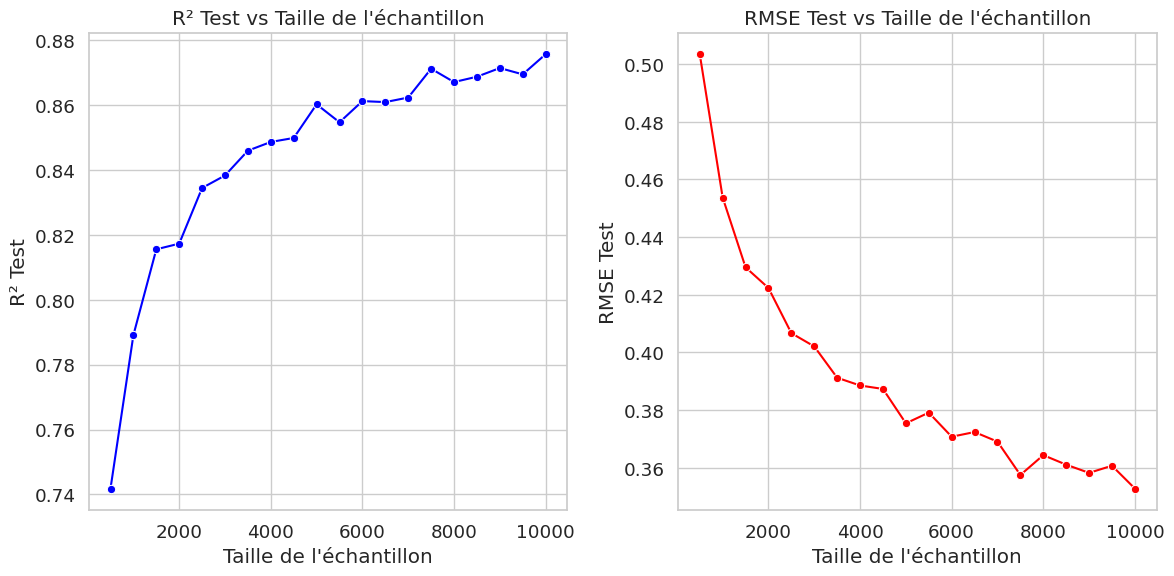

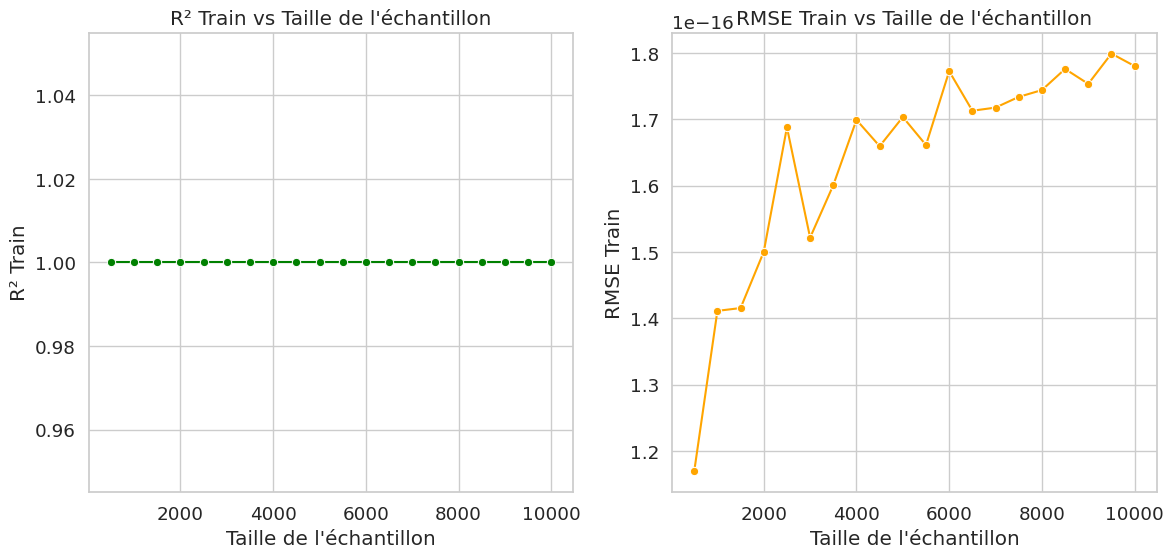

In [9]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_tree = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle
        model_tree = DecisionTreeRegressor(random_state=42)
        model_tree.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = model_tree.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = model_tree.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_tree['sample_size'].append(size)
    results_tree['R2_test'].append(np.mean(r2_test_scores))
    results_tree['RMSE_test'].append(np.mean(rmse_test_scores))
    results_tree['R2_train'].append(np.mean(r2_train_scores))
    results_tree['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_tree = pd.DataFrame(results_tree)
print("Résultats moyens Decision Tree Regressor :")
print(df_results_tree)

#  Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/tree_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_tree, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_tree, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/tree_train_scores.png", dpi=300)
plt.show()
plt.close()

**SUPPORT VECTOR REGRESSION**

Résultats moyens Support Vector Regression :
    sample_size   R2_test  RMSE_test  R2_train  RMSE_train
0           500  0.952230   0.213168  0.967745    0.176122
1          1000  0.957862   0.200847  0.967284    0.179622
2          1500  0.957641   0.203924  0.968323    0.177197
3          2000  0.961521   0.196904  0.967446    0.178866
4          2500  0.961293   0.195554  0.968423    0.177341
5          3000  0.960775   0.196424  0.967907    0.178679
6          3500  0.962368   0.193275  0.968154    0.178125
7          4000  0.963731   0.190514  0.968143    0.177891
8          4500  0.964179   0.189556  0.968321    0.177727
9          5000  0.963965   0.188462  0.967921    0.178713
10         5500  0.964570   0.186960  0.968325    0.177740
11         6000  0.964650   0.187786  0.968508    0.177170
12         6500  0.964811   0.186734  0.968625    0.176821
13         7000  0.965991   0.183863  0.968592    0.176850
14         7500  0.965905   0.184200  0.968953    0.175950
15         

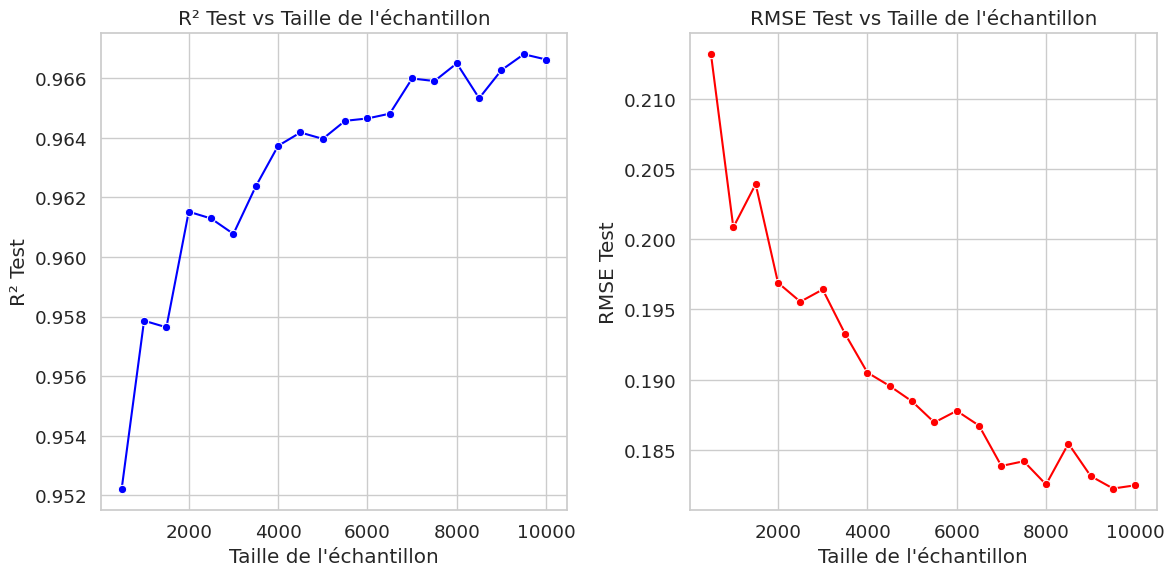

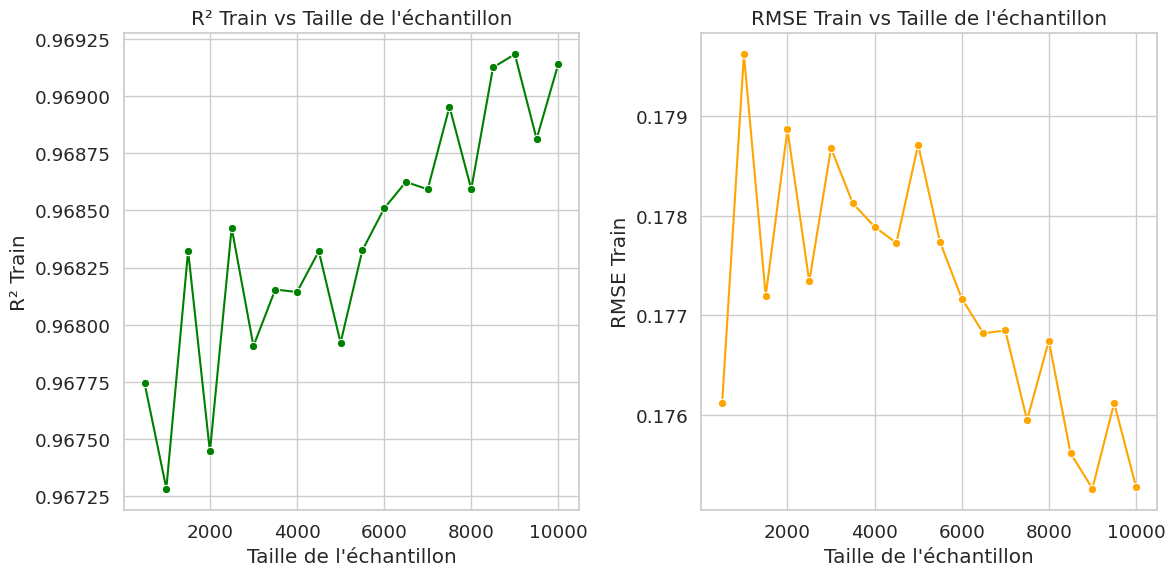

In [10]:
# Données
X = Data.drop(columns=['E_field'])
y = Data['E_field']

# Paramètres
sample_sizes = list(range(500, 10001, 500))
n_repeats = 20

# Résultats
results_svr = {
    'sample_size': [],
    'R2_test': [], 'RMSE_test': [],
    'R2_train': [], 'RMSE_train': []
}

# Boucle principale
for size in sample_sizes:
    r2_test_scores, rmse_test_scores = [], []
    r2_train_scores, rmse_train_scores = [], []

    for _ in range(n_repeats):
        # Échantillonnage aléatoire
        indices = np.random.choice(len(X), size=size, replace=False)
        X_sample = X.iloc[indices]
        y_sample = y.iloc[indices]

        # Séparation train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X_sample, y_sample, test_size=0.2, random_state=None
        )

        # Modèle SVR
        modelSVR = SVR(kernel='rbf', C=1.0, epsilon=0.1)
        modelSVR.fit(X_train, y_train)

        # Prédictions test
        y_pred_test = modelSVR.predict(X_test)
        r2_test_scores.append(r2_score(y_test, y_pred_test))
        rmse_test_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

        # Prédictions train
        y_pred_train = modelSVR.predict(X_train)
        r2_train_scores.append(r2_score(y_train, y_pred_train))
        rmse_train_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))

    # Moyennes
    results_svr['sample_size'].append(size)
    results_svr['R2_test'].append(np.mean(r2_test_scores))
    results_svr['RMSE_test'].append(np.mean(rmse_test_scores))
    results_svr['R2_train'].append(np.mean(r2_train_scores))
    results_svr['RMSE_train'].append(np.mean(rmse_train_scores))

# DataFrame résultats
df_results_svr = pd.DataFrame(results_svr)
print("Résultats moyens Support Vector Regression :")
print(df_results_svr)

#  Visualisation 4 graphiques
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# R² Test
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_test', marker='o', color='blue')
plt.title('R² Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Test')
plt.grid(True)

# RMSE Test
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_test', marker='o', color='red')
plt.title('RMSE Test vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Test')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/svr_test_scores.png", dpi=300)
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
# R² Train
plt.subplot(1, 2, 1)
sns.lineplot(data=df_results_svr, x='sample_size', y='R2_train', marker='o', color='green')
plt.title('R² Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('R² Train')
plt.grid(True)

# RMSE Train
plt.subplot(1, 2, 2)
sns.lineplot(data=df_results_svr, x='sample_size', y='RMSE_train', marker='o', color='orange')
plt.title('RMSE Train vs Taille de l\'échantillon')
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('RMSE Train')
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/svr_train_scores.png", dpi=300)
plt.show()
plt.close()

In [11]:
model_results = [
    ('LinearRegression', df_results_lr),
    ('RandomForest', df_results_rf),
    ('XGBoost', df_results_xgb),
    ('DecisionTree', df_results_tree),
    ('SVR', df_results_svr),
]

# Initialisation des résultats comparatifs
comparison = []

# Pour chaque taille d’échantillon
sample_sizes = df_results_xgb['sample_size'].unique()

for size in sample_sizes:
    best_r2_test, best_r2_train = -float('inf'), -float('inf')
    best_rmse_test, best_rmse_train = float('inf'), float('inf')
    best_model_r2_test = best_model_r2_train = ''
    best_model_rmse_test = best_model_rmse_train = ''

    for model_name, df in model_results:
        row = df[df['sample_size'] == size]
        if not row.empty:
            r2_test = row['R2_test'].values[0]
            rmse_test = row['RMSE_test'].values[0]
            r2_train = row['R2_train'].values[0]
            rmse_train = row['RMSE_train'].values[0]

            if r2_test > best_r2_test:
                best_r2_test = r2_test
                best_model_r2_test = model_name

            if rmse_test < best_rmse_test:
                best_rmse_test = rmse_test
                best_model_rmse_test = model_name

            if r2_train > best_r2_train:
                best_r2_train = r2_train
                best_model_r2_train = model_name

            if rmse_train < best_rmse_train:
                best_rmse_train = rmse_train
                best_model_rmse_train = model_name

    # Ajout au tableau comparatif
    comparison.append({
        'sample_size': size,
        'Best_R2_test': best_r2_test,
        'Model_R2_test': best_model_r2_test,
        'Best_RMSE_test': best_rmse_test,
        'Model_RMSE_test': best_model_rmse_test,
        'Best_R2_train': best_r2_train,
        'Model_R2_train': best_model_r2_train,
        'Best_RMSE_train': best_rmse_train,
        'Model_RMSE_train': best_model_rmse_train
    })

# Conversion en DataFrame
df_comparison = pd.DataFrame(comparison)

# Affichage du tableau comparatif
print(" Meilleurs modèles par taille d’échantillon :")
print(df_comparison)

# Sauvegarde optionnelle
print("Tableau sauvegardé")
df_comparison.to_csv("/gdrive/MyDrive/Résultats TNT/comparaison_meilleurs_modeles.csv", index=False)


 Meilleurs modèles par taille d’échantillon :
    sample_size  Best_R2_test Model_R2_test  Best_RMSE_test Model_RMSE_test  \
0           500      0.952230           SVR        0.213168             SVR   
1          1000      0.957862           SVR        0.200847             SVR   
2          1500      0.957641           SVR        0.203924             SVR   
3          2000      0.961521           SVR        0.196904             SVR   
4          2500      0.961293           SVR        0.195554             SVR   
5          3000      0.960775           SVR        0.196424             SVR   
6          3500      0.962368           SVR        0.193275             SVR   
7          4000      0.963731           SVR        0.190514             SVR   
8          4500      0.964179           SVR        0.189556             SVR   
9          5000      0.963965           SVR        0.188462             SVR   
10         5500      0.964570           SVR        0.186960             SVR   
11    

=== Performances SVR ===
R² Train : 0.9695
RMSE Train : 0.1744
R² Test : 0.9674
RMSE Test : 0.1816


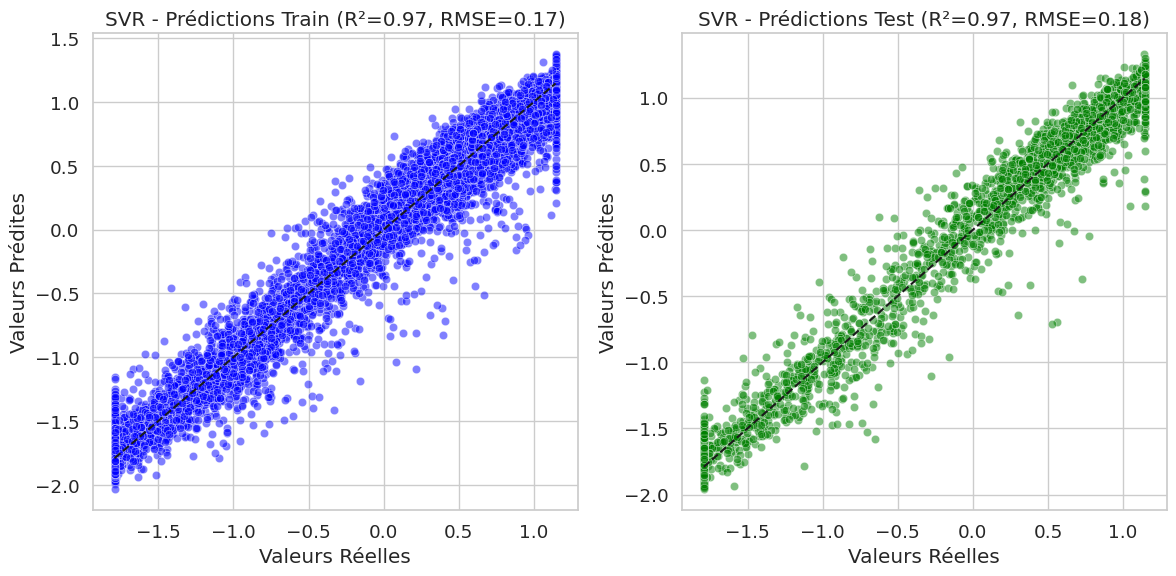

In [12]:
# Chargement des données
df_train = pd.read_csv("/gdrive/MyDrive/Résultats TNT/donnees_train.csv")
df_test = pd.read_csv("/gdrive/MyDrive/Résultats TNT/donnees_test.csv")

# Séparation variables (X) et cible (y)
X_train = df_train.drop(columns=["E_field"])
y_train = df_train["E_field"]

X_test = df_test.drop(columns=["E_field"])
y_test = df_test["E_field"]

# Initialisation et entraînement du modèle SVR
model_svr = SVR(kernel='rbf',C=1.0, epsilon=0.1)
model_svr.fit(X_train, y_train)

# Prédictions
y_pred_train = model_svr.predict(X_train)
y_pred_test = model_svr.predict(X_test)

# Évaluation
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Résultats
print("=== Performances SVR ===")
print(f"R² Train : {r2_train:.4f}")
print(f"RMSE Train : {rmse_train:.4f}")
print(f"R² Test : {r2_test:.4f}")
print(f"RMSE Test : {rmse_test:.4f}")

# Visualisations
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(12, 6))

# Scatter plot Train
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.title(f"SVR - Prédictions Train (R²={r2_train:.2f}, RMSE={rmse_train:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

# Scatter plot Test
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title(f"SVR - Prédictions Test (R²={r2_test:.2f}, RMSE={rmse_test:.2f})")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Valeurs Prédites")
plt.grid(True)

plt.tight_layout()
plt.savefig("/gdrive/MyDrive/Images Pré-traitement/svr_donnee_test.png", dpi=300)
plt.show()


In [13]:
# === CLASSEMENT DES MODÈLES POUR CHAQUE MÉTRIQUE ===

rankings = []

for size in sample_sizes:
    ranking_entry = {'sample_size': size}

    # Pour chaque métrique et type de données
    for metric in ['R2_test', 'RMSE_test']:
        scores = []
        for model_name, df in model_results:
            value = df[df['sample_size'] == size][metric].values[0]
            scores.append((model_name, value))

        # Pour R² → tri décroissant (plus c’est haut, mieux c’est)
        if 'R2' in metric:
            scores.sort(key=lambda x: x[1], reverse=True)
        # Pour RMSE → tri croissant (plus c’est bas, mieux c’est)
        else:
            scores.sort(key=lambda x: x[1])

        # Enregistrement des classements
        for rank, (model, score) in enumerate(scores, start=1):
            ranking_entry[f'{metric}_rank_{rank}'] = model

    rankings.append(ranking_entry)

# Conversion en DataFrame
df_rankings = pd.DataFrame(rankings)

# Affichage du classement
print("\n Classement des modèles (par métrique et taille d’échantillon) :")
print(df_rankings)

# Sauvegarde optionnelle
#df_rankings.to_csv("/gdrive/MyDrive/Résultats TNT/classement_modeles_par_metrique.csv", index=False)
#print(" Classement sauvegardé.")



 Classement des modèles (par métrique et taille d’échantillon) :
    sample_size R2_test_rank_1    R2_test_rank_2    R2_test_rank_3  \
0           500            SVR  LinearRegression           XGBoost   
1          1000            SVR  LinearRegression           XGBoost   
2          1500            SVR  LinearRegression           XGBoost   
3          2000            SVR  LinearRegression           XGBoost   
4          2500            SVR  LinearRegression           XGBoost   
5          3000            SVR  LinearRegression           XGBoost   
6          3500            SVR  LinearRegression           XGBoost   
7          4000            SVR  LinearRegression           XGBoost   
8          4500            SVR  LinearRegression           XGBoost   
9          5000            SVR  LinearRegression           XGBoost   
10         5500            SVR  LinearRegression           XGBoost   
11         6000            SVR  LinearRegression           XGBoost   
12         6500         